In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Import 2018 NYC Weather data

In [3]:
weather = pd.read_csv("Data/2018_NYC_Weather.csv", parse_dates = ["DATE"])
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-01,7.83,0.00,0.0,0.0,19,7
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-02,8.05,0.00,0.0,0.0,26,13
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-03,3.13,0.00,0.0,0.0,30,16
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-04,12.53,0.76,9.8,1.2,29,19
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-05,12.97,0.00,0.0,7.1,19,9


In [4]:
weather = weather[["DATE","PRCP","SNOW","TMAX","TMIN"]] #Keep Date, Rain, Snow, Temp.
weather["TAVG"] = [((weather.TMAX[x]+weather.TMIN[x])/2) for x in range(len(weather.TMAX))] #Do calculate average per day
weather["month"] = weather.DATE.dt.month #Create a new column "month" to store the month of that date
weather["day"] = weather.DATE.dt.day #Create a new column "day" to store the month of that date
weather.head()

,DATE,PRCP,SNOW,TMAX,TMIN,TAVG,month,day
0,2018-01-01,0.00,0.0,19,7,13.0,1,1
1,2018-01-02,0.00,0.0,26,13,19.5,1,2
2,2018-01-03,0.00,0.0,30,16,23.0,1,3
3,2018-01-04,0.76,9.8,29,19,24.0,1,4
4,2018-01-05,0.00,0.0,19,9,14.0,1,5


* PRCP : The total liquid water equivalent of presumably all precipitation
* SNWD : Snow depth data
* TMAX(F) : The maximum recorded temperature at a given station on a given day
* TMIN(F): The minimum recorded temperature at a given station on a given day

## Snow Date 
Snow dates were mainly during Jan-March.

In [5]:
snow_date = weather[weather.SNOW>0]
snow_date

,DATE,PRCP,SNOW,TMAX,TMIN,TAVG,month,day
3,2018-01-04,0.76,9.8,29,19,24.0,1,4
16,2018-01-17,0.19,0.4,36,22,29.0,1,17
28,2018-01-29,0.00,0.1,47,35,41.0,1,29
29,2018-01-30,0.11,0.9,36,24,30.0,1,30
37,2018-02-07,0.85,0.5,45,30,37.5,2,7
47,2018-02-17,0.52,4.4,40,28,34.0,2,17
65,2018-03-07,1.41,3.2,39,33,36.0,3,7
79,2018-03-21,0.99,8.2,39,31,35.0,3,21
80,2018-03-22,0.06,0.2,50,32,41.0,3,22
91,2018-04-02,0.59,5.5,43,33,38.0,4,2


In [6]:
snow_Jan_Mar = snow_date[snow_date.month<4]#Only choose month in Jan-March
snow_Jan_Mar = snow_Jan_Mar[["DATE","SNOW","day"]]
snow_Jan_Mar.rename(columns={"DATE" : "pickup_time"},inplace=True)
snow_Jan_Mar

,pickup_time,SNOW,day
3,2018-01-04,9.8,4
16,2018-01-17,0.4,17
28,2018-01-29,0.1,29
29,2018-01-30,0.9,30
37,2018-02-07,0.5,7
47,2018-02-17,4.4,17
65,2018-03-07,3.2,7
79,2018-03-21,8.2,21
80,2018-03-22,0.2,22


## Average Temp. for each month

In [66]:
TAVG_month = weather.groupby("month").agg({"TAVG" : "mean"})
TAVG_month

,TAVG
month,
1,31.677419
2,42.035714
3,40.145161
4,49.450000
5,66.887097
6,71.650000
7,77.629032
8,78.129032
9,70.716667


## Average PRCP for each month

In [8]:
PRCP_month = weather.groupby("month").agg({"PRCP" : "mean"})
PRCP_month.rename(columns = {"PRCP":"AVG_PRCP"},inplace=True)
PRCP_month

,AVG_PRCP
month,
1,0.070323
2,0.208214
3,0.166774
4,0.192667
5,0.113871
6,0.103667
7,0.240323
8,0.277097
9,0.206333


## Import 2018 TLC Trip Data

In [9]:
TLC_2018 = pd.read_csv("Data/All_TLC_2018Trip.csv")
TLC_2018.head()

,Pickup_ID,month,count,category
0,1.0,1.0,584.0,Taxi
1,2.0,1.0,4.0,Taxi
2,3.0,1.0,432.0,Taxi
3,4.0,1.0,19656.0,Taxi
4,5.0,1.0,2.0,Taxi


In [48]:
#Do sum by each month for Taxi and FHV
Taxi_2018 = TLC_2018.loc[TLC_2018.category == "Taxi"]
FHV_2018 = TLC_2018.loc[TLC_2018.category == "FHV"]
Taxi_2018_month_sum = Taxi_2018.groupby(["month"]).agg({"count":"sum"})
FHV_2018_month_sum = FHV_2018.groupby(["month"]).agg({"count":"sum"})
#Do average trip per day in a month for Taxi and FHV
Days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
Taxi_2018_month_per_day_trip = [Taxi_2018_month_sum["count"][x]/test[x-1] for x in range(1,13)]
FHV_2018_month_per_day_trip = [FHV_2018_month_sum["count"][x]/test[x-1] for x in range(1,13)]

## 2018 Month Trip of Taxi and FHV with Average Temp.

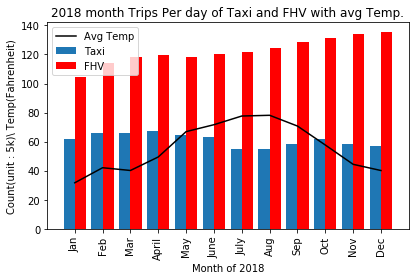

In [64]:
#Create two variables for xlabel usage
month_num = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
month = pd.Series(["Jan","Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec"])

#Plot bar chart for Taxi and FHV by month
plt.bar(month_num-0.2,[Taxi_2018_month_per_day_trip[x]/5000 for x in range(12)] ,0.4,label="Taxi")
plt.bar(month_num+0.2,[FHV_2018_month_per_day_trip[x]/5000 for x in range(12)],0.4,color="r",label="FHV")
#Plot a line of month avg Temp.
plt.plot(month_num,TAVG_month.TAVG,color = "k",label = "Avg Temp")

plt.xticks(month_num,month,rotation = 90)
plt.xlabel("Month of 2018")
plt.ylabel("Count(unit : 5k)\ Temp(Fahrenheit)")
plt.title("2018 month Trips Per day of Taxi and FHV with avg Temp.")
plt.legend()
plt.tight_layout()
plt.savefig("month_trip_with_temp.png")

### Do correlation test for month trips per day of Taxi and month avg. Temp.

In [54]:
#Using nonparametric method, Spearman correlation, measures of the relationship between two datasets.
stats.spearmanr(Taxi_2018_month_per_day_trip, TAVG_month.TAVG)
#Given a p-value of 0.1, we choose to accept the null hypothesis, 
#and therefore Temp wouldn't effect the willing people take a Taxi.

SpearmanrResult(correlation=-0.41958041958041964, pvalue=0.1745190081300594)

In [55]:
stats.spearmanr(FHV_2018_month_per_day_trip, TAVG_month.TAVG)
#Given a p-value of 0.1, we choose to accept the null hypothesis, 
#and therefore Temp wouldn't effect the willing people take a FHV.

SpearmanrResult(correlation=0.21678321678321683, pvalue=0.49855598552418856)

In [56]:
stats.spearmanr( [FHV_2018_month_per_day_trip[x]-Taxi_2018_month_per_day_trip[x] for x in range(12)],
                TAVG_month.TAVG)
#Given a p-value of 0.1, we choose to accept the null hypothesis, 
#and therefore Temp wouldn't effect the willing people take a FHV or Taxi.

SpearmanrResult(correlation=0.2797202797202798, pvalue=0.37856866966230307)

## 2018 Month Trips Per day of Taxi and FHV with Average PRCP

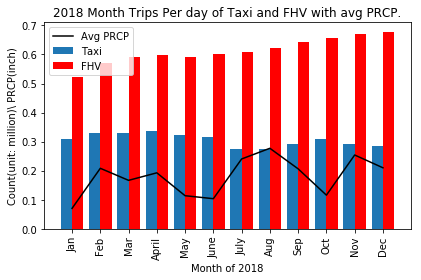

In [65]:
plt.bar(month_num-0.2,[Taxi_2018_month_per_day_trip[x]/1000000 for x in range(12)],0.4,label="Taxi")
plt.bar(month_num+0.2,[FHV_2018_month_per_day_trip[x]/1000000 for x in range(12)],0.4,color="r",label="FHV")
plt.plot(month_num,PRCP_month.AVG_PRCP,color = "k",label = "Avg PRCP")
plt.xticks(month_num,month,rotation = 90)
plt.xlabel("Month of 2018")
plt.ylabel("Count(unit: million)\ PRCP(inch)")
plt.title("2018 Month Trips Per day of Taxi and FHV with avg PRCP.")
plt.legend()
plt.tight_layout()
plt.savefig("month_trip_with_PRCP.png")

## Do correlation test for month trips Per day of Taxi and month avg. PRCP.

In [61]:
#Using nonparametric method, Spearman correlation, measures of the relationship between two datasets.
stats.spearmanr(Taxi_2018_month_per_day_trip,PRCP_month.AVG_PRCP)
#Given a p-value of 0.1, we choose to reject the null hypothesis, 
#and therefore PRCP(Rain) would effect the willing people take a Taxi.

SpearmanrResult(correlation=-0.5874125874125874, pvalue=0.044609296463363105)

In [62]:
stats.spearmanr(FHV_2018_month_per_day_trip,PRCP_month.AVG_PRCP)
#Given a p-value of 0.1, we choose to reject the null hypothesis, 
#and therefore PRCP(Rain) would effect the willing people take a FHV.

SpearmanrResult(correlation=0.5524475524475525, pvalue=0.06251148327961512)

In [63]:
stats.spearmanr( [FHV_2018_month_per_day_trip[x]-Taxi_2018_month_per_day_trip[x] for x in range(12)],
                PRCP_month.AVG_PRCP)
#Given a p-value of 0.1, we choose to reject the null hypothesis, 
#and therefore PRCP(Rain) would effect the willing people take a FHV or Taxi.

SpearmanrResult(correlation=0.5384615384615385, pvalue=0.07089431754922315)

## 2018 Snow Days trip analysis

In [27]:
#This function can do calculate average Taxi trip of snow day and non-snow day in a month.
def taxi_month_snowcount(url1,url2,month,snow_Jan_Mar):
    
    #Clean Yellow Taxi Data
    data = pd.read_csv(url1,parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
    data = data[["tpep_pickup_datetime"]]
    data = data.rename(columns = {"tpep_pickup_datetime":"pickup_time"})
    data["month"] = data.pickup_time.dt.month
    data["day"] = data.pickup_time.dt.day
    data = data.loc[(data.month == month)]
    data.dropna(inplace=True)
    
    #Merge snow data with clean Yellow Taxi Data
    taxi_snow_Jan = pd.merge(data,snow_Jan_Mar[snow_Jan_Mar.pickup_time.dt.month==month],on="day",how='outer')
    taxi_snow_Jan.fillna({"SNOW":0},inplace=True)
    
    #Calculate average trip of snow date for yellow
    #snow result
    snow_yellow_data = taxi_snow_Jan[taxi_snow_Jan.SNOW>0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    snow_result = (snow_yellow_data["pickup_time_x"].mean())
    #non-snow result
    nonsnow_yellow_data = taxi_snow_Jan[taxi_snow_Jan.SNOW==0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    nonsnow_result = (nonsnow_yellow_data["pickup_time_x"].mean())
    
    #Clean Green Taxi Data
    green_data = pd.read_csv(url2,parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
    green_data = green_data[["lpep_pickup_datetime"]]
    green_data = green_data.rename(columns = {"lpep_pickup_datetime":"pickup_time"})
    green_data["month"] = green_data.pickup_time.dt.month
    green_data["day"] = green_data.pickup_time.dt.day
    green_data = green_data.loc[(green_data.month ==month)] 
    green_data.dropna(inplace=True)
    
    #Merge snow data with clean Green Taxi Data
    Gtaxi_snow_Jan = pd.merge(green_data,snow_Jan_Mar[snow_Jan_Mar.pickup_time.dt.month==month],on="day",how='outer')
    Gtaxi_snow_Jan.fillna({"SNOW":0},inplace=True)
    
    #Calculate average trip of snow date for green and sun of yellow and green
    #snow result
    snow_green_data = Gtaxi_snow_Jan[Gtaxi_snow_Jan.SNOW>0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    snow_result = snow_result + (snow_green_data["pickup_time_x"].mean())
    #non-snow result
    nonsnow_green_data = Gtaxi_snow_Jan[Gtaxi_snow_Jan.SNOW==0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    nonsnow_result = nonsnow_result + (nonsnow_green_data["pickup_time_x"].mean())
    
    
    return([snow_result,nonsnow_result])

In [28]:
#This function can do calculate average FHV trip of snow day and non-snow day in a month.
def FHV_month_snowcount(url,month,snow_Jan_Mar):
    
    #Clean Yellow Taxi Data
    FHV_data = pd.read_csv(url,parse_dates=['Pickup_DateTime', 'DropOff_datetime'])
    FHV_data = FHV_data[["Pickup_DateTime"]]
    FHV_data = FHV_data.rename(columns = {"Pickup_DateTime":"pickup_time"})
    FHV_data["month"] = FHV_data.pickup_time.dt.month
    FHV_data["day"] = FHV_data.pickup_time.dt.day
    FHV_data = FHV_data.loc[(FHV_data.month == month)]
    FHV_data.dropna(inplace=True)
    
    #Merge snow data with clean Yellow Taxi Data
    taxi_snow = pd.merge(FHV_data,snow_Jan_Mar[snow_Jan_Mar.pickup_time.dt.month==month],on="day",how='outer')
    taxi_snow.fillna({"SNOW":0},inplace=True)
    
    #Calculate average trip of snow date
    #snow result
    snow_FHV_data = taxi_snow[taxi_snow.SNOW>0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    snow_result = (snow_FHV_data["pickup_time_x"].mean())
    #non-snow result
    nonsnow_FHV_data = taxi_snow[taxi_snow.SNOW==0].groupby("day").agg({"month":"mean","SNOW":"mean","pickup_time_x":"count"})
    nonsnow_result = (nonsnow_FHV_data["pickup_time_x"].mean())
    
    return([snow_result,nonsnow_result])

In [161]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
Taxi_Jan_snow_result = taxi_month_snowcount("/Users/adam/Bootcamp_API_project/Data/Jan/yellow_tripdata_2018-01.csv",
                  "/Users/adam/Bootcamp_API_project/Data/Jan/green_tripdata_2018-01.csv",
                  1,snow_Jan_Mar)
Taxi_Jan_snow_result

[269562.0, 313877.7037037037]

In [162]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
FHV_Jan_snow_result = FHV_month_snowcount("/Users/adam/Bootcamp_API_project/Data/Jan/fhv_tripdata_2018-01.csv",
                                          1,snow_Jan_Mar)
FHV_Jan_snow_result

[539256.25, 653743.2962962963]

In [163]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
Taxi_Feb_snow_result = taxi_month_snowcount("/Users/adam/Bootcamp_API_project/Data/Feb/yellow_tripdata_2018-02.csv",
                  "/Users/adam/Bootcamp_API_project/Data/Feb/green_tripdata_2018-02.csv",
                  2,snow_Jan_Mar)
Taxi_Feb_snow_result

[339352.5, 330090.6923076923]

In [164]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
FHV_Feb_snow_result = FHV_month_snowcount("/Users/adam/Bootcamp_API_project/Data/Feb/fhv_tripdata_2018-02.csv",
                                          2,snow_Jan_Mar)
FHV_Feb_snow_result

[762091.5, 685635.0]

In [165]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
Taxi_Mar_snow_result = taxi_month_snowcount("/Users/adam/Bootcamp_API_project/Data/March/yellow_tripdata_2018-03.csv",
                  "/Users/adam/Bootcamp_API_project/Data/March/green_tripdata_2018-03.csv",
                  3,snow_Jan_Mar)
Taxi_Mar_snow_result

[257819.0, 339015.6785714286]

In [166]:
#We don't put original raw data which is too huge on github, so you need to download the files from TLC to run this.
FHV_Mar_snow_result = FHV_month_snowcount("/Users/adam/Bootcamp_API_project/Data/March/fhv_tripdata_2018-03.csv",
                                          3,snow_Jan_Mar)
FHV_Mar_snow_result

[618605.6666666666, 718908.2857142857]

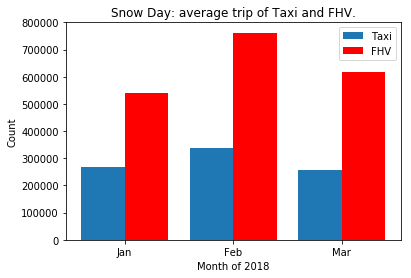

In [177]:
snow_taxi = [Taxi_Jan_snow_result[0],Taxi_Feb_snow_result[0],Taxi_Mar_snow_result[0]]
non_snow_taxi = [Taxi_Jan_snow_result[1],Taxi_Feb_snow_result[1],Taxi_Mar_snow_result[1]]

snow_FHV = [FHV_Jan_snow_result[0],FHV_Feb_snow_result[0],FHV_Mar_snow_result[0]]
non_snow_FHV = [FHV_Jan_snow_result[1],FHV_Feb_snow_result[1],FHV_Mar_snow_result[1]]

plt.bar(month_num[0:3]-0.2,snow_taxi,0.4,label="Taxi")
plt.bar(month_num[0:3]+0.2,snow_FHV,0.4,color="r",label="FHV")
plt.xticks(month_num[0:3],month[0:3])
plt.xlabel("Month of 2018")
plt.ylabel("Count")
plt.title("Snow Day: average trip of Taxi and FHV.")
plt.legend()

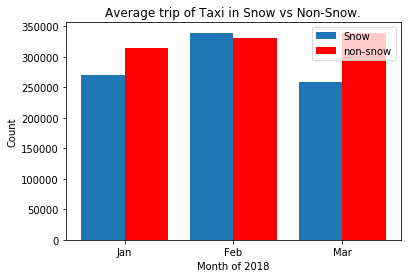

In [176]:
plt.bar(month_num[0:3]-0.2,snow_taxi,0.4,label="Snow")
plt.bar(month_num[0:3]+0.2,non_snow_taxi,0.4,color="r",label="non-snow")
plt.xticks(month_num[0:3],month[0:3])
plt.xlabel("Month of 2018")
plt.ylabel("Count")
plt.title("Average trip of Taxi in Snow vs Non-Snow.")
plt.legend()

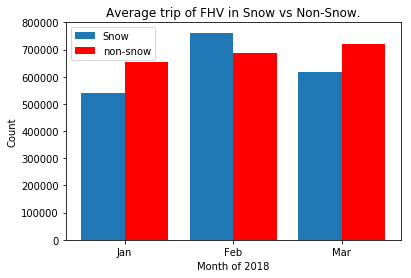

In [175]:
plt.bar(month_num[0:3]-0.2,snow_FHV,0.4,label="Snow")
plt.bar(month_num[0:3]+0.2,non_snow_FHV,0.4,color="r",label="non-snow")
plt.xticks(month_num[0:3],month[0:3])
plt.xlabel("Month of 2018")
plt.ylabel("Count")
plt.title("Average trip of FHV in Snow vs Non-Snow.")
plt.legend()